In [450]:
import sys
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt

import importlib

from astroLuSt.synthetics import dataaugmentation as ald


# AugmentAxis

### Generate a dataset

This dataset will contian the following:
- `nsamples` samples
- `ncols` datapoints along first axes (columns)
- `nrows` datapoints along second axes (rows)
- `nchannels` number of channels (values per cell)

each sample consists of `ncols * nrows * nchannels` datapoints.

For the 3d case one just has no `nchannels` everything else is the same as for the 4d case.

(23, 50, 2, 3)
(23, 50, 1)
(23, 1)


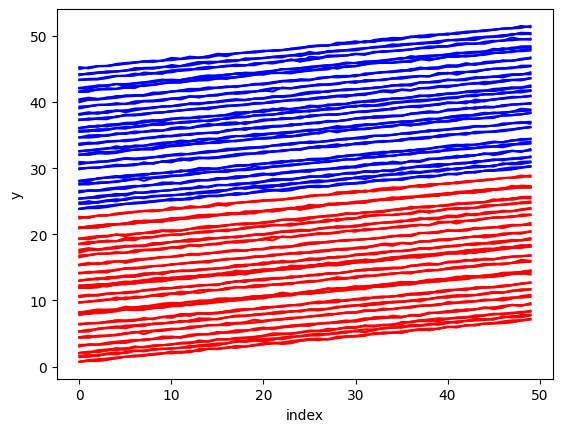

In [459]:
def generate_4d(
    shape:tuple=None,
    xmin:float=0, xmax:float=1,
    func=None
    ):
    if shape is None:
        shape = (1,20,1,1)
    if func is None:
        func = lambda x: x
    X = np.empty(shape)
    for i, xi in enumerate(X):
        x_ = np.linspace(np.zeros((X.shape[-2],X.shape[-1]))+xmin, xmax, X.shape[1])
        
        hshift = np.random.rand(x_.shape[1]).reshape(1,-1,1)
        vshift = np.zeros_like(x_)+i
        cnoise = np.random.randn(x_.shape[0], x_.shape[2]).reshape(50,1,-1)*0.1
        vshift[:,1,:] += X.shape[0]
        X[i] = func(x_+hshift) + vshift + cnoise

    return X

X = generate_4d(
    shape=(23,50,2,3),
    xmin=0, xmax=2*np.pi,
    # func=np.sin,
    func=None,
)
X3d = X[:,:,0,0]
X3d = X3d.reshape(*X3d.shape,1)
y = np.random.choice([0,1,2],size=(X.shape[0],1), replace=True,  p=[0.5,0.3,0.2])

print(X.shape)
print(X3d.shape)
print(y.shape)
#visualize
fig = plt.figure()
ax1 = fig.add_subplot(111)
for x in X:
    ax1.plot(x[:,0,:], 'r-')
    # ax1.plot(x[:,1,0], 'r-')
    ax1.plot(x[:,1,:], 'b-')
ax1.set_xlabel('index')
ax1.set_ylabel('y')
plt.show()

### Application on 4d data

AugmentAxis(
    nsamples=7,
    ntransformations=-3, methods=['add_noise', 'crop', 'flip_axis', 'obscure_observations', 'rescale', 'shift_features'], transform_order='unchanged',
    shift=(0, 20),
    flip=False,
    npoints=5, neighbors=False,
    fill_value_obscure=0, fill_value_range=(0, 1),
    cutout_start=0, cutout_size=(4, 6),
    interpkind='linear', fill_value_crop='extrapolate',
    noise_mag=(0, 0.5),
    feature_range_min=0, feature_range_max=1,
    axis=0,
    seed=None,
    verbose=1,
)


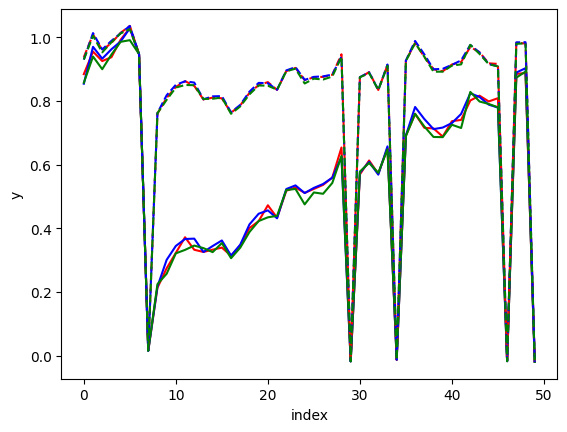

In [499]:
importlib.reload(ald)
AA = ald.AugmentAxis(
    nsamples=7, ntransformations=-3,
    shift=(0,20), methods=None, transform_order=None,
    npoints=5, neighbors=False,
    fill_value_obscure=0, fill_value_range=(0,1),
    cutout_start=0, cutout_size=(4,6),
    interpkind=None, fill_value_crop=None,
    noise_mag=(0,0.5),
    feature_range_min=None, feature_range_max=None,
    axis=(0),
    seed=None,
    verbose=1,
)
print(AA)

AA.fit(X)
AA.random_transform(X[0], axis=(0,1))
X_new, y_new, y1  = AA.flow(X,
    y=y,
    X_misc=[y],
    sample_weights=None,
)


#visualize
fig = plt.figure()
ax1 = fig.add_subplot(111)
#4d
# ax1.plot(X[0,:,0,:], 'r:')
# ax1.plot(X[0,:,1,:], 'b:')
ax1.plot(X_new[0,:,0,0], 'r-')
ax1.plot(X_new[0,:,0,1], 'b-')
ax1.plot(X_new[0,:,0,2], 'g-')
ax1.plot(X_new[0,:,1,0], 'r--')
ax1.plot(X_new[0,:,1,1], 'b--')
ax1.plot(X_new[0,:,1,2], 'g--')


ax1.set_xlabel('index')
ax1.set_ylabel('y')
plt.show()

### Application on 3d data

AugmentAxis(
    nsamples=7,
    ntransformations=-1, methods=['add_noise', 'crop', 'flip_axis', 'obscure_observations', 'rescale', 'shift_features'], transform_order='unchanged',
    shift=(0, 20),
    flip=False,
    npoints=5, neighbors=True,
    fill_value_obscure='random', fill_value_range=(0, 1),
    cutout_start=0, cutout_size=(10, 15),
    interpkind='linear', fill_value_crop='extrapolate',
    noise_mag=1,
    feature_range_min=0, feature_range_max=(1, 5),
    axis=0,
    seed=None,
    verbose=1,
)


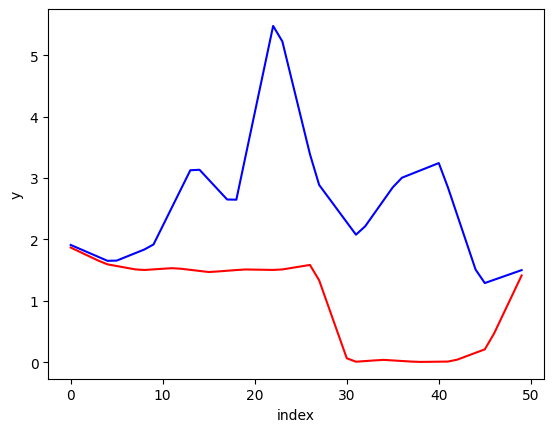

In [515]:
importlib.reload(ald)
AA = ald.AugmentAxis(
    nsamples=7,
    shift=(0,20), methods=None, transform_order=None,
    npoints=5, neighbors=True,
    fill_value_obscure='random', fill_value_range=(0,1),
    cutout_start=0, cutout_size=(10,15),
    interpkind=None, fill_value_crop=None,
    noise_mag=1,
    feature_range_min=0, feature_range_max=(1,5),
    axis=0,
    seed=None,
    verbose=1,
)
print(AA)


AA.fit(X)
X_new, y_new, y1  = AA.flow(X3d,
    y=y,
    X_misc=[y],
    sample_weights=None,
)


#visualize
fig = plt.figure()
ax1 = fig.add_subplot(111)

#3d
# ax1.plot(X3d[0,:], 'r:')
ax1.plot(X_new[0,:], 'r-')
ax1.plot(X_new[1,:], 'b-')


ax1.set_xlabel('index')
ax1.set_ylabel('y')
plt.show()